# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
#Mounting my google drive
from google.colab import drive
drive.mount('/content/drive')

#importing required libraries
import pandas as pd
import re

#Reading the dataset
df = pd.read_csv('/content/drive/My Drive/reviews_movie.csv')
df.head()

def tokenize(text):
    # Tokenize text into words
    return re.findall(r'\b\w+\b', text.lower())

def generate_ngrams(tokens, n):
    # Generating N-grams from a list of tokens
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

def count_ngrams(dataset, n):
    # Counting the frequency of all the N-grams in my dataset
    ngram_counts = {}
    for text in dataset:
        tokens = tokenize(text)
        ngrams = generate_ngrams(tokens, n)
        for ngram in ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1
    return ngram_counts

def calculate_bigram_probabilities(dataset):
    # Calculating the probabilities for all bigrams in my dataset
    bigram_probabilities = {}
    unigram_counts = count_ngrams(dataset, 1)
    bigram_counts = count_ngrams(dataset, 2)
    for bigram in bigram_counts:
        w1, w2 = bigram
        bigram_probabilities[bigram] = bigram_counts[bigram] / unigram_counts[(w1,)]
    return bigram_probabilities

def extract_noun_phrases(text):
    # Extracting noun phrases from text based on consecutive nouns
    words = text.split()
    noun_phrases = []
    current_phrase = []
    for word in words:
        if word.isalnum() and word.isalpha():  # Checking if word is alphanumeric and consists only of alphabetic characters
            current_phrase.append(word)
        elif current_phrase:
            noun_phrases.append(' '.join(current_phrase))
            current_phrase = []
    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases


def calculate_relative_probabilities(dataset):
    # Calculate relative probabilities of each review in terms of other reviews
    noun_phrase_frequencies = {}
    for text in dataset:
        noun_phrases = extract_noun_phrases(text)
        for noun_phrase in noun_phrases:
            if noun_phrase in noun_phrase_frequencies:
                noun_phrase_frequencies[noun_phrase] += 1
            else:
                noun_phrase_frequencies[noun_phrase] = 1

    if not noun_phrase_frequencies:
        print("No noun phrases found in the dataset.")
        return {}

    max_frequency = max(noun_phrase_frequencies.values())

    relative_probabilities = {}
    for i, text in enumerate(dataset):
        relative_probabilities[i] = {}
        noun_phrases = extract_noun_phrases(text)
        for noun_phrase in noun_phrases:
            relative_probabilities[i][noun_phrase] = noun_phrase_frequencies[noun_phrase] / max_frequency

    return relative_probabilities

def print_table(data):
    # Print out the result in a table format
    col_names = sorted(set(noun_phrase for row in data.values() for noun_phrase in row))
    print("Review\t" + "\t".join(col_names))
    for i, row in data.items():
        print(f"{i}\t" + "\t".join(str(row.get(col, 0)) for col in col_names))

# Task 1: Count the frequency of all the N-grams (N=3)
print("N-gram counts:")
ngram_counts = count_ngrams(df['clean_review'], 3)
if ngram_counts:
    for ngram, count in ngram_counts.items():
        print(f"{ngram}: {count}")
else:
    print("No N-grams found in the dataset.")

# Task 2: Calculat probabilities for all bigrams in the dataset
print("\nBigram probabilities:")
bigram_probabilities = calculate_bigram_probabilities(df['clean_review'])
for bigram, probability in bigram_probabilities.items():
    print(f"{bigram}: {probability}")

# Task 3: Extracting noun phrases and calculate relative probabilities
print("\nRelative probabilities of noun phrases:")
relative_probabilities = calculate_relative_probabilities(df['clean_review'])
if relative_probabilities:
    print_table(relative_probabilities)


Streaming output truncated to the last 5000 lines.
('intellig', 'filmmak'): 0.5
('filmmak', 'show'): 0.14285714285714285
('show', 'audienc'): 0.2222222222222222
('audienc', 'great'): 0.1111111111111111
('great', 'respect'): 0.07692307692307693
('respect', 'fire'): 0.25
('fire', 'dialogu'): 0.5
('dialogu', 'pack'): 0.2
('pack', 'inform'): 0.5
('inform', 'relentless'): 0.2
('relentless', 'pace'): 0.6666666666666666
('pace', 'jump'): 0.14285714285714285
('jump', 'differ'): 0.16666666666666666
('differ', 'time'): 0.6666666666666666
('time', 'oppenheim'): 0.02857142857142857
('oppenheim', 'life'): 0.023529411764705882
('life', 'continu'): 0.08333333333333333
('continu', 'hour'): 0.5
('hour', 'runtim'): 0.16666666666666666
('runtim', 'visual'): 0.25
('visual', 'clue'): 0.2
('clue', 'guid'): 1.0
('guid', 'viewer'): 1.0
('viewer', 'time'): 0.125
('time', 'youll'): 0.02857142857142857
('youll', 'get'): 0.5
('get', 'grip'): 0.07692307692307693
('grip', 'quit'): 1.0
('quit', 'quickli'): 0.2
('qui

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import math
import pandas as pd

# Query
query = "A captivating film with strong performances and beautiful cinematography"

def tokenize(text):
    # Tokenize text into terms (words)
    return text.lower().split()

def calculate_tf(document):
    # Calculate term frequency (TF) for a document
    tf = {}
    terms = tokenize(document)
    total_terms = len(terms)
    for term in terms:
        tf[term] = tf.get(term, 0) + 1 / total_terms
    return tf

def calculate_idf(documents):
    # Calculate inverse document frequency (IDF) for each term
    idf = {}
    total_documents = len(documents)
    for document in documents:
        terms = set(tokenize(document))
        for term in terms:
            idf[term] = idf.get(term, 0) + 1
    for term, freq in idf.items():
        idf[term] = math.log(total_documents / (freq + 1))
    return idf

def calculate_tf_idf(tf, idf):
    # Calculate TF-IDF weights for each term in a document
    tf_idf = {}
    for term, tf_weight in tf.items():
        tf_idf[term] = tf_weight * idf.get(term, 0)
    return tf_idf

def vectorize_document(document, idf):
    # Represent a document in the TF-IDF space
    tf = calculate_tf(document)
    tf_idf = calculate_tf_idf(tf, idf)
    return tf_idf

def vectorize_query(query, idf):
    # Represent a query in the TF-IDF space
    tf = calculate_tf(query)
    tf_idf = calculate_tf_idf(tf, idf)
    return tf_idf

def cosine_similarity(vec1, vec2):
    # Calculate cosine similarity between two vectors
    dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in set(vec1) & set(vec2))
    magnitude1 = math.sqrt(sum(weight ** 2 for weight in vec1.values()))
    magnitude2 = math.sqrt(sum(weight ** 2 for weight in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

def rank_documents(query, documents):
    # Rank documents with respect to the query using cosine similarity
    idf = calculate_idf(documents)
    query_vec = vectorize_query(query, idf)
    ranked_documents = []
    for i, document in enumerate(documents):
        document_vec = vectorize_document(document, idf)
        similarity = cosine_similarity(query_vec, document_vec)
        ranked_documents.append((i, similarity))
    ranked_documents.sort(key=lambda x: x[1], reverse=True)
    return ranked_documents

# Extracting clean reviews from DataFrame
reviews = df['clean_review'].tolist()

# Rank documents with respect to the query
ranked_documents = rank_documents(query, reviews)

# Print ranked documents
print("Ranked documents:")
for rank, (index, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Document {index} (Similarity: {similarity:.4f}) - \"{df['title'][index]}\" - \"{df['review'][index]}\"")


Ranked documents:
Rank 1: Document 13 (Similarity: 0.0854) - "Technically superb but..." - "At its core Oppenheimer is a technical masterpiece. The haunting score by Ludwig Göransson is one of the film's most profound highlights. The score acts as its own character in how it builds and arcs throughout the film and peaks during arguably the best moment, the bomb drop. Paired with an aggressive and bold sound design that transports you into the screen, both sound aspects make this film truly remarkable.There are no faults in the incredible acting of the monumental cast in Oppenheimer. Murphy plays Oppenheimer in a way that enables the audience to feel the gravity of his situation and the historical repercussions that follow. However, Robert Downey Jr., who plays Lewis Strauss, is arguably the best the Oppenheimer cast brings. Downey Jr perfectly portrays the slow spiral and eventual downfall of his character.The film shines when it shifts into a more psychological element focusing on Opp

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

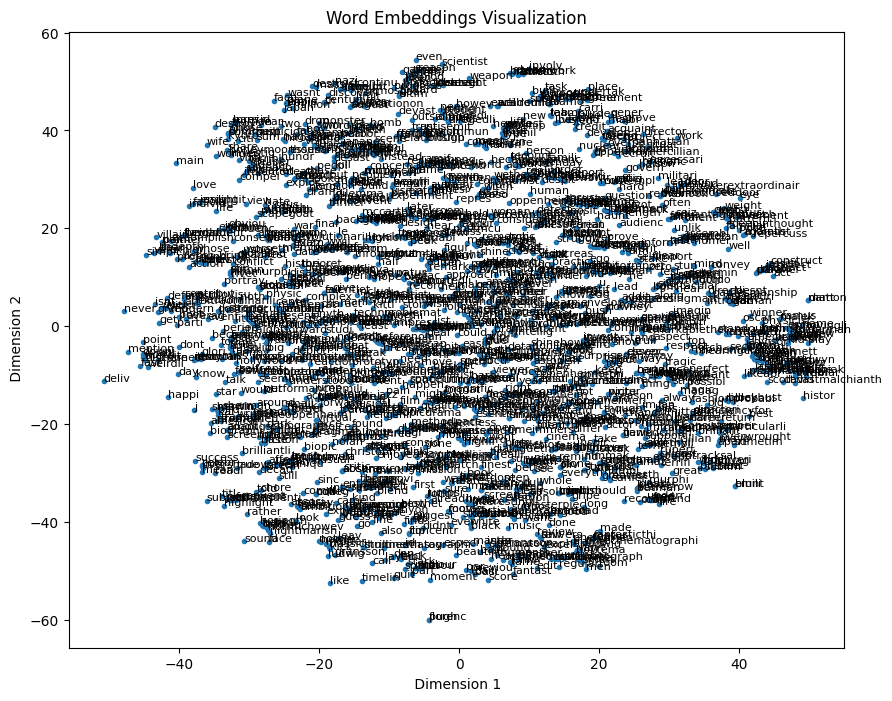

In [2]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Tokenize the text data
tokenized_data = [text.split() for text in df['clean_review']]

# Train Word2Vec model
embedding_size = 300  # Set the dimensionality of the word embeddings
window_size = 5  # Set the window size for context words
min_word_count = 1  # Minimum word count threshold
workers = 4  # Number of parallel workers
sg = 1  # Use Skip-gram (CBOW if sg=0)

model = Word2Vec(sentences=tokenized_data, vector_size=embedding_size, window=window_size, min_count=min_word_count, workers=workers, sg=sg)

# Visualize the word embeddings
def visualize_embeddings(model):
    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]

    tsne = TSNE(n_components=2, random_state=42)
    word_vectors_tsne = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='.')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=8)
    plt.xlabel(' Dimension 1')
    plt.ylabel(' Dimension 2')
    plt.title('Word Embeddings Visualization')
    plt.show()

# Visualize word embeddings
visualize_embeddings(model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/JayanthJR/JahnavJayanthReddy_INFO5731_Spring2024/blob/3b4665dd77a149ab0a42c68dc0d140e359a00e59/Training%20and%20Evaluation%20data%20For%20movie%20reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

#The First Question Is most challenging for me in this assignment
#I enjoy doing the 2nd question. From this assignment I have learned word embedding and many more